In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":12})


In [22]:
def RungeKutta(x ,y , dx , dydx):
    k1 = dx*dydx(x,y) # 起点斜率
    k2 = dx*dydx(x+dx/2. , y+k1/2.) # 
    k3 = dx*dydx(x+dx/2. , y+k2/2.) # 
    k4 = dx*dydx(x+dx, y+k3) # 终点斜率

    y = y + 1./6*(k1 + 2*k2 + 2*k3 + k4)
    x = x + dx
    return x,y

In [23]:
def dydx1(x,y):
    return x**2
def y1(x):
    return x**3/3. + 2/3.

In [24]:
x0 = 1.
y0 = 1.
dx = 0.1
x_end = 2.

x_rk = [x0]
y_rk = [y0]

y = y0
x = x0


while x < x_end:
    x, y = RungeKutta(x,y,dx,dydx1)
    x_rk.append(x)
    y_rk.append(y)


In [25]:
def Euler(x, y, dx, dydx):
    return x+dx, y+dx*dydx1(x,y)

x_eu = [x0]
y_eu = [y0]

y = y0
x = x0

while x <= x_end:
    x,y = Euler(x,y,dx,dydx1)
    x_eu.append(x)
    y_eu.append(y)


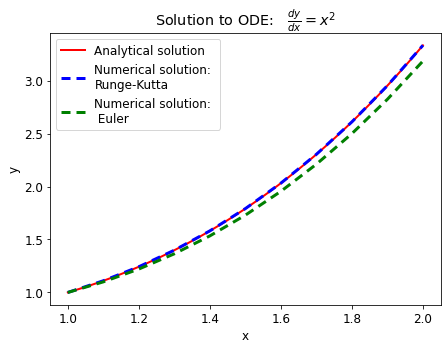

In [26]:
# show
from cProfile import label


plt.figure(figsize=(7,5))
plt.plot(np.linspace(1,2,50), y1(np.linspace(1,2,50)),label='Analytical solution', color='red',lw=2)
plt.plot(x_rk, y_rk, label='Numerical solution:\nRunge-Kutta', dashes=(3,2),color='blue',lw=3)
plt.plot(x_eu, y_eu, label='Numerical solution: \n Euler',dashes=(3,2), color='green', lw=3)
plt.legend(loc='best', fontsize=12)
plt.title(r"Solution to ODE:$\quad\frac{dy}{dx}=x^2$")
plt.xlabel("x",fontsize=12)
plt.ylabel("y",fontsize=12)
plt.show()

In [27]:
#exerise dydx=f(x)-->y=F(x)
def dydx2(x,y):
    return 1 / (x*y)
def y2(x): # analytical solution
    return np.sqrt(1+2*np.log(x))
def Euler2(x, y, dx, dydx):
    return x+dx, y+dx*dydx2(x,y)
    

In [28]:
# RK4 find the results
x0 = 1.
y0 = 1.
dx = 0.1
xend = 2.

x_rk = [x0]
y_rk = [y0]
x = x0
y = y0
while x <= xend:
    x,y = RungeKutta(x,y,dx,dydx2)
    x_rk.append(x)
    y_rk.append(y)
    

In [29]:
# euler find the results
x_eu = [x0]
y_eu = [y0]
x = x0
y = y0
while x <= xend:
    x,y = Euler2(x,y,dx, dydx2)
    x_eu.append(x)
    y_eu.append(y)

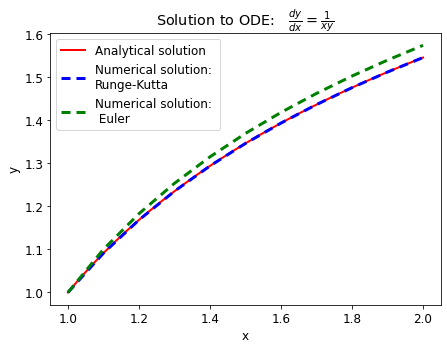

In [30]:
from cProfile import label

plt.figure(figsize=(7,5))
plt.plot(np.linspace(1,2,50), y2(np.linspace(1,2,50)),label='Analytical solution', color='red',lw=2)
plt.plot(x_rk, y_rk, label='Numerical solution:\nRunge-Kutta', dashes=(3,2),color='blue',lw=3)
plt.plot(x_eu, y_eu, label='Numerical solution: \n Euler',dashes=(3,2), color='green', lw=3)
plt.legend(loc='best', fontsize=12)
plt.title(r"Solution to ODE:$\quad\frac{dy}{dx}=\frac{1}{xy}$")
plt.xlabel("x",fontsize=12)
plt.ylabel("y",fontsize=12)
plt.show()

In [31]:
# each step in RK4C
def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2, y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2, y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2, y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2, y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1 + 2*k2 + 2*k3 + k4)
    z = z + 1./6.*(h1 + 2*h2 + 2*h3 + h4)
    x = x + dx
    return x,y,z

In [32]:
def dvdt(t,v,x):
    return -1.*x-1.
def dxdt(t,v,x):
    return v

In [33]:
t0 = 0
v0 = 0
x0 = 0
dt = 0.1
t_end = 30

t_list = [t0]
v_list = [v0]
x_list = [x0]

t = t0
v = v0
x = x0

while t <t_end:
    t, v, x = RungeKuttaCoupled(t,v,x,dt, dvdt, dxdt)
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)


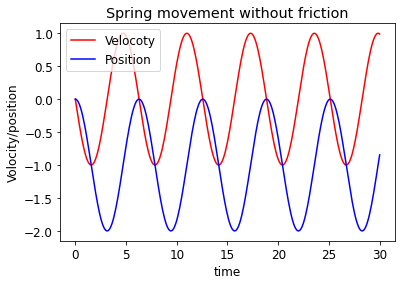

In [34]:
plt.title("Spring movement without friction")
plt.plot(t_list, v_list, label='Velocoty', color='red')
plt.plot(t_list, x_list, label='Position', color='blue')
plt.xlabel("time")
plt.ylabel("Volocity/position")
plt.legend(loc='best')
plt.show()

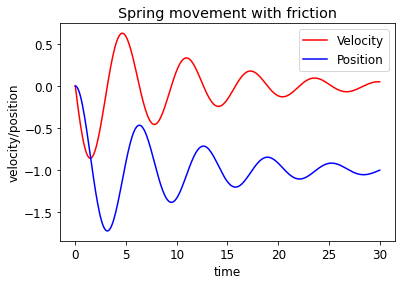

In [35]:
def dvdt1(t,v,x):
    return -1.*x -1 -0.2*v
def dxdt(t, v, x):
    return v
t_list = [t0]
v_list = [v0]
x_list = [x0]

t = t0
v = v0
x = x0

while t <= t_end:
    t,v,x = RungeKuttaCoupled(t,v,x,dt,dvdt1,dxdt)
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)

plt.title("Spring movement with friction")
plt.plot(t_list, v_list, label="Velocity", color='red')
plt.plot(t_list, x_list, label="Position", color='blue')
plt.xlabel("time")
plt.ylabel("velocity/position")
plt.legend(loc='best')
plt.show()

In [36]:
def dHdx(x,t,H):
    # dH/dx = K*(t-t_ext)
    # K =1 
    # t_ext = 0
    return t
def dtdx(x,t,H):
    return -H

In [37]:
H0 = 10
t0 = 100
x0 = 0
x_end = 1
dx = 0.01

In [38]:
x_list = [x0]
t_list = [t0]
H_list = [H0]

x = x0; t = t0; H = H0
while x <= x_end:
    x,t,H = RungeKuttaCoupled(x,t,H,dx,dtdx,dHdx)
    x_list.append(x)
    t_list.append(t)
    H_list.append(H)
    

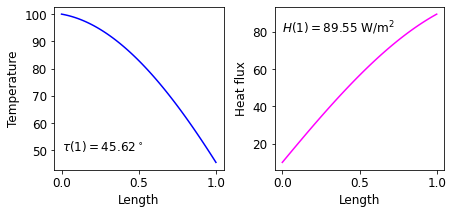

In [39]:
fig, axes = plt.subplots(1,2,figsize=(7,3))
ax1 = axes[0]
ax2 = axes[1]

ax1.plot(x_list,t_list,color='blue')
ax1.set_xlabel("Length")
ax1.set_ylabel("Temperature")
ax1.text(0,50,r'$\tau(1)=%.2f^\circ$' % t_list[-1])

ax2.plot(x_list, H_list, color='magenta')
ax2.set_xlabel("Length")
ax2.set_ylabel("Heat flux")
ax2.text(0,80,r"$H(1)=%.2f$ W/m$^2$" % H_list[-1])

plt.subplots_adjust(wspace=0.3)
plt.show()

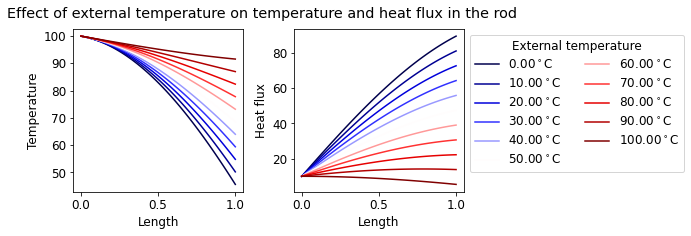

In [45]:
fig, axes = plt.subplots(1,2,figsize=(7,3))
ax1 = axes[0]
ax2 = axes[1]

temp_list = []
flux_list = []
temps = np.linspace(0,100,11)
colors = plt.cm.seismic(np.linspace(0,1,len(temps)))

for i in range(len(temps)):
    x_list = [x0]
    t_list = [t0]
    H_list = [H0]
    x = x0
    t = t0
    H = H0
    def dHdx(x,t,H):
        return t-temps[i]
    while x <= x_end:
        x,t,H = RungeKuttaCoupled(x,t,H,dx, dtdx,dHdx)
        x_list.append(x)
        t_list.append(t)
        H_list.append(H)
    ax1.plot(x_list, t_list, color=colors[i])
    ax2.plot(x_list, H_list, color=colors[i],label="%.2f$^\circ$C" %temps[i])
ax1.set_xlabel("Length")
ax1.set_ylabel("Temperature")
ax2.set_xlabel("Length")
ax2.set_ylabel("Heat flux")
ax2.legend(bbox_to_anchor=[1,1],ncol=2,title="External temperature")
plt.subplots_adjust(wspace=0.3)
plt.suptitle("Effect of external temperature on temperature and heat flux in the rod")
plt.show()